<a href="https://colab.research.google.com/github/Keerati-Deja/calcofi_geospatial-machineLearning_practice/blob/main/calcofi_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [3]:
path_bottle = "/content/drive/MyDrive/dataset/calcofi/bottle.csv"
path_cast = "/content/drive/MyDrive/dataset/calcofi/cast.csv"

In [5]:
df_bottle = pd.read_csv(path_bottle, low_memory=False)
df_cast = pd.read_csv(path_cast, low_memory=False)

NOTE:
index 4 : Depthm = Depth in meters \
index 5 : T_degC = Temp(C) \
index 6 : Salnty = Salinity of water\
index 7 : O2ml_L\
index 8 : STheta = Density

In [6]:
df_bottle.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [7]:
# reduce dataset
bottle=df_bottle.iloc[:,[0,4,5,6,7,8]]
bottle

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta
0,1,0,10.500,33.4400,NaN,25.64900
1,1,8,10.460,33.4400,NaN,25.65600
2,1,10,10.460,33.4370,NaN,25.65400
3,1,19,10.450,33.4200,NaN,25.64300
4,1,20,10.450,33.4210,NaN,25.64300
...,...,...,...,...,...,...
864858,34404,0,18.744,33.4083,5.805,23.87055
864859,34404,2,18.744,33.4083,5.805,23.87072
864860,34404,5,18.692,33.4150,5.796,23.88911
864861,34404,10,18.161,33.4062,5.816,24.01426


In [8]:
bottle.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Cst_Cnt  864863 non-null  int64  
 1   Depthm   864863 non-null  int64  
 2   T_degC   853900 non-null  float64
 3   Salnty   817509 non-null  float64
 4   O2ml_L   696201 non-null  float64
 5   STheta   812174 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 39.6 MB


<Axes: >

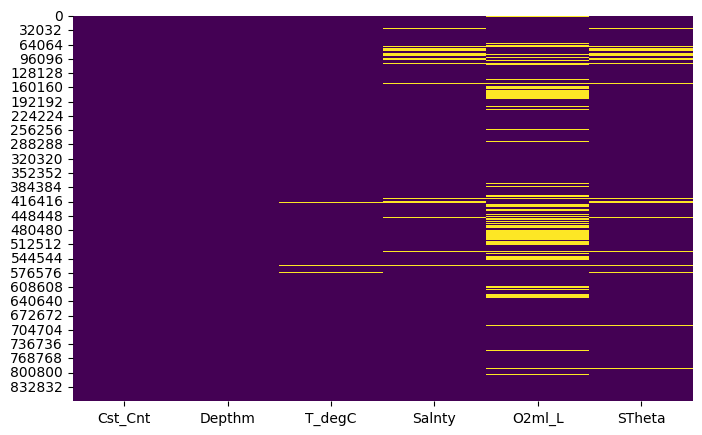

In [9]:
# NaN viz
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(bottle.isna(),cbar=False,cmap='viridis')



In [10]:
# Data Cleaning

cols=bottle.columns
for colonna in cols:
    bottle=bottle[~bottle[colonna].isnull()]

<Axes: >

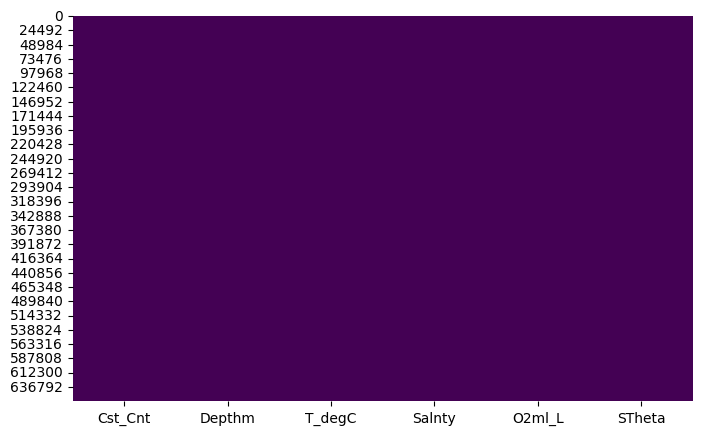

In [11]:
bottle=bottle.reset_index(drop=True)
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(bottle.isna(),cbar=False,cmap='viridis')


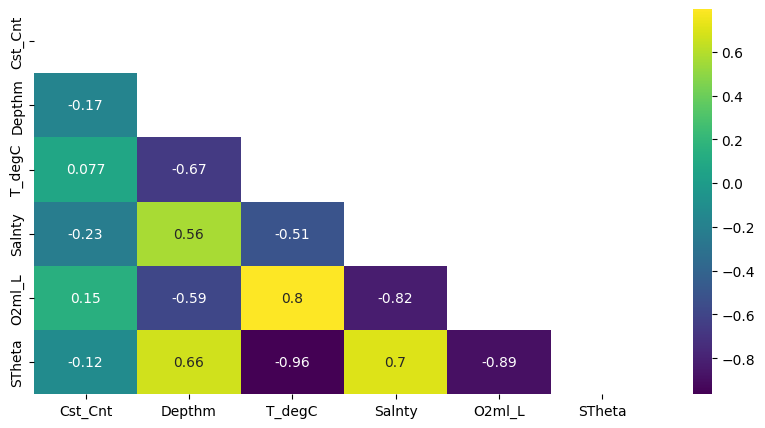

In [12]:
# Plot Correlation Matrix
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(bottle.corr(numeric_only = True), dtype=bool))
sns.heatmap(bottle.corr(numeric_only = True), cbar = True, annot = True, cmap="viridis", mask = mask);

NOTE:

The Pearson's coefficient between Temperature and Salinity is not so high, -0.51


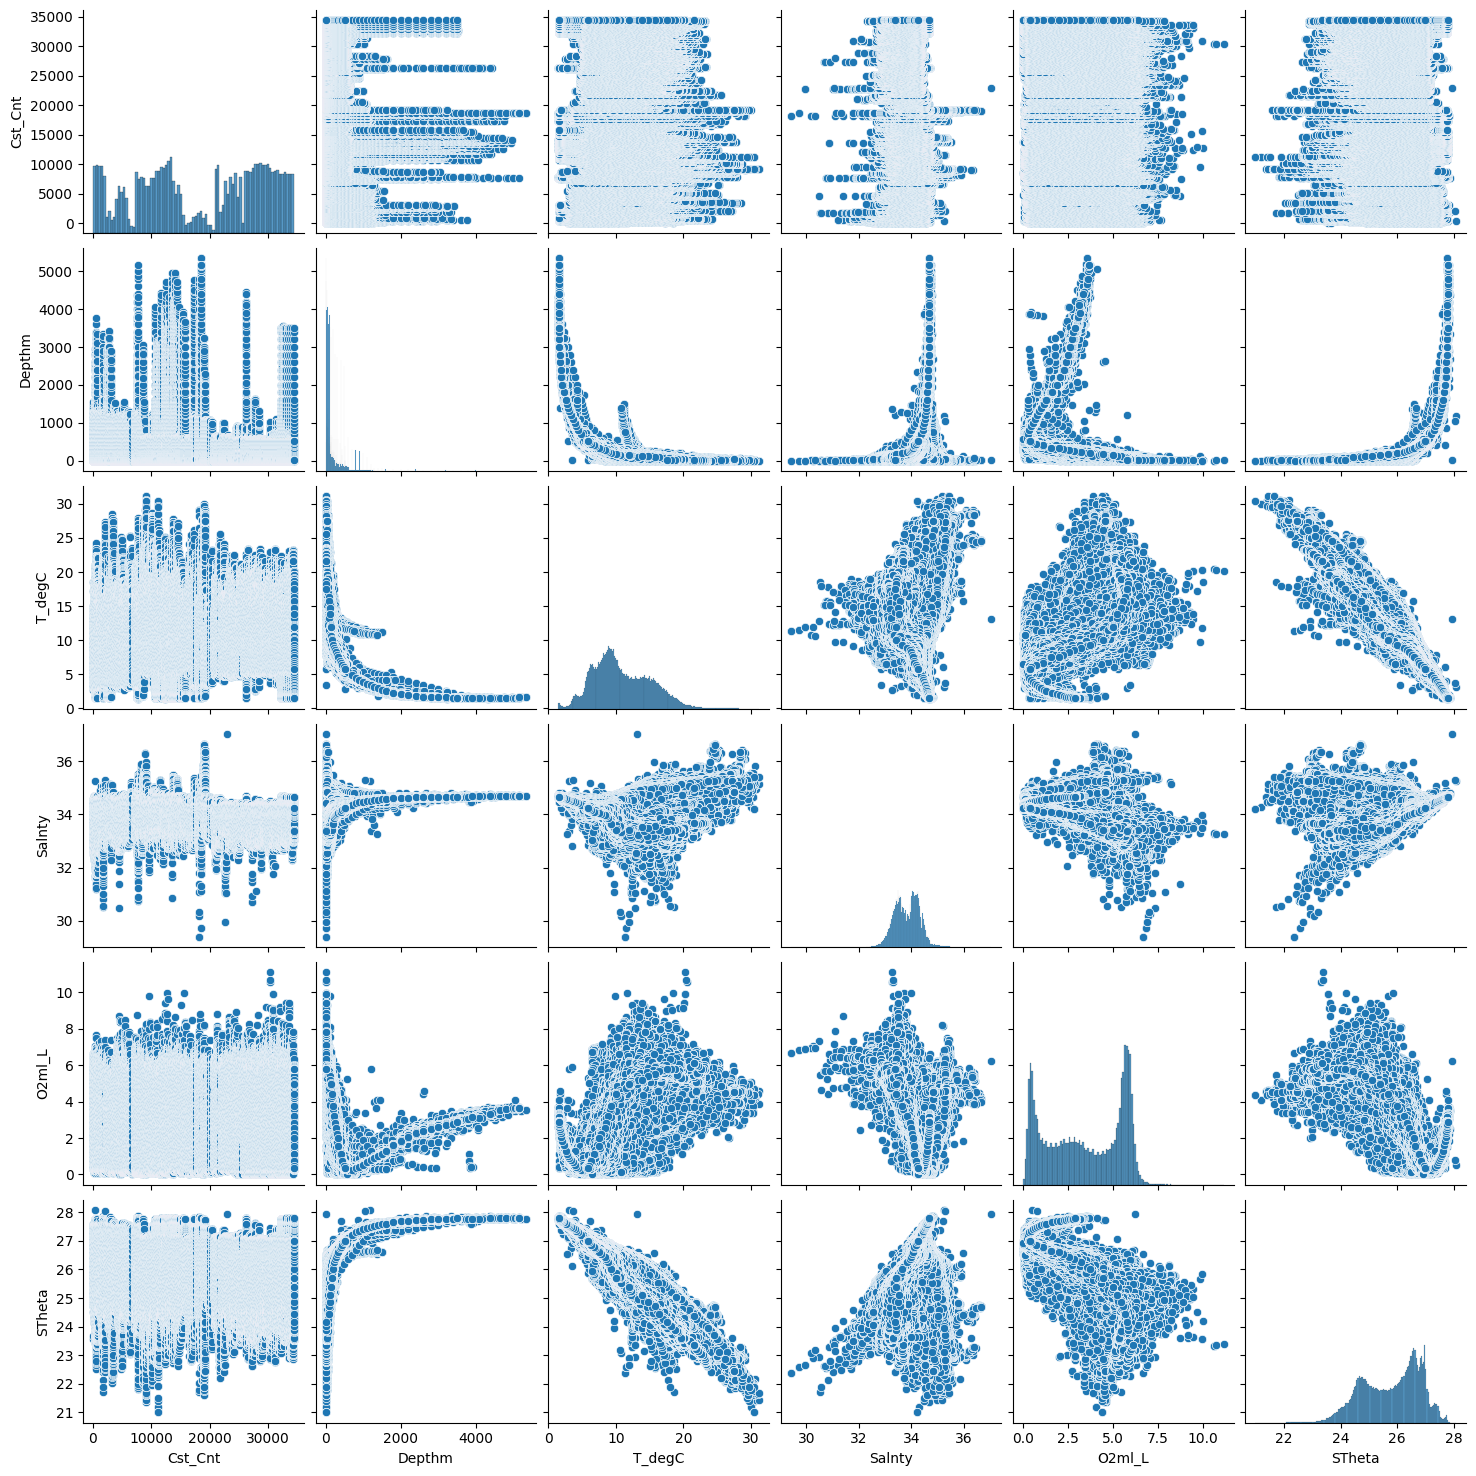

In [13]:
# Feature Engineering
#Plot pairwise

sns.pairplot(bottle)



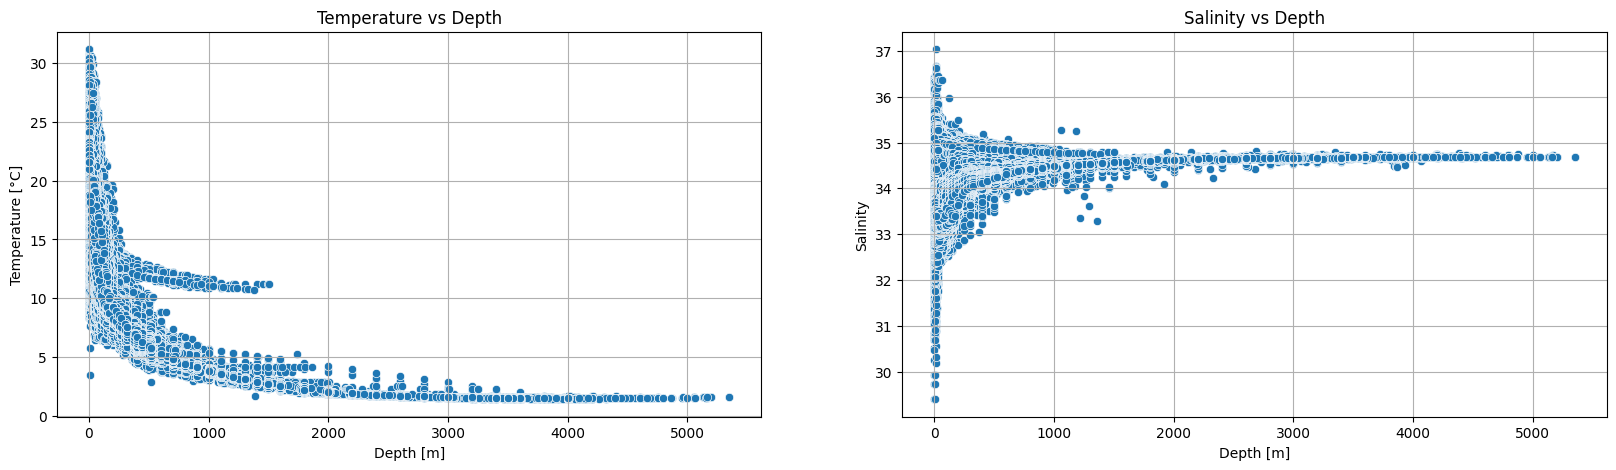

In [14]:
# Depth-temp & Depth-Saln

fig, ax = plt.subplots(1,2, figsize=(20,5))
g1=sns.scatterplot(data=bottle,x='Depthm',y='T_degC',ax=ax[0])
ax[0].set(xlabel='Depth [m]',ylabel='Temperature [°C]',title='Temperature vs Depth')
ax[0].grid()
g2=sns.scatterplot(data=bottle,x='Depthm',y='Salnty',ax=ax[1])
ax[1].set(xlabel='Depth [m]',ylabel='Salinity',title='Salinity vs Depth')
ax[1].grid()

